In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra
import ForwardDiff
import DiffResults
using AstrodynamicsBase
using Printf
using JSON
using CSV
using DataFrames
using LaTeXStrings
using ColorSchemes
LaTeXStrings

LaTeXStrings

In [2]:
include("../src/SailorMoon.jl")   # relative path to main file of module
param3b = SailorMoon.dynamics_parameters()
paramMulti = SailorMoon.multi_shoot_parameters(param3b)
gr()
fs = 13


┌ Warning: Replacing docs for `Main.SailorMoon.integrate_rk4 :: Union{Tuple{ODEProblem, Real}, Tuple{ODEProblem, Real, Union{Nothing, Vector{T} where T}}, Tuple{ODEProblem, Real, Union{Nothing, Vector{T} where T}, Bool}, Tuple{ODEProblem, Real, Union{Nothing, Vector{T} where T}, Bool, Bool}}` in module `Main.SailorMoon`
└ @ Base.Docs docs\Docs.jl:240


13

In [3]:
filenames = [
    "../run/data/diffcorr_0619_NoThrust2.csv", 
    "../run/data/diffcorr_0618_velThrust.csv",
    "../run/data/diffcorr_0619_EMrotThrust2.csv",
    "../run/data/diffcorr_0618_maxJCThrust2.csv",
    "../run/data/diffcorr_0619_TidalThrust2.csv",
    ]

labels = ["No Thrust", "vel-dir", "EMrot", "max JC", "Tidal"]
# filename5 = "../run/data/diffcorr_0619_EMrotThrust2.csv"

p1 = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[50,120],
    xlabel=L"\theta_{m0}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1
);


In [4]:
function interpolatecolor(value, vmin, vmax, cs=:viridis)
    cs = cgrad(cs)
    color = cs[(value - vmin) / (vmax - vmin)]
    return color
end

interpolatecolor (generic function with 2 methods)

82.64395374128033
51.43479098389457
49.553159170425225
46.5954565489545
52.87780993979629


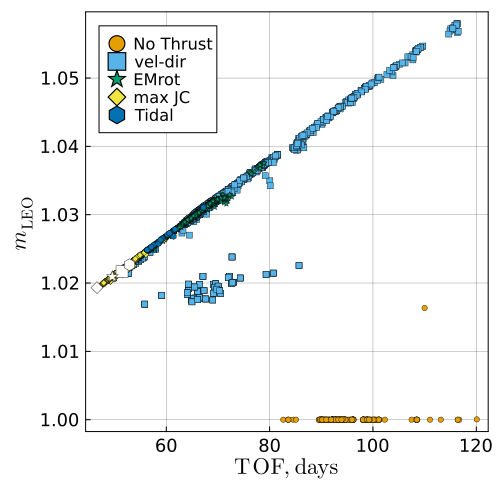

In [22]:
# tof     = df.tof .* param3b.tstar / 86640
# thetasf = df.thetasf
# thetamf = pi .- thetasf
# thetam0 = thetamf .- df.tof .* param3b.oml
# thetam0 = [mod2pi(el) for el in thetam0] 



p = plot(
    size=(500,500), frame_style=:box, grid=0.4, legend=false, 
#     xlims=[0, 2*pi], ylims=[30,140],
    xlabel=L"\textrm{TOF, days}", 
    ylabel=L"m_{\textrm{LEO}}",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs+2, ylabelfontsize=fs+2, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-2
);


colors = ["red", "orange", "yellow", "green", "blue", "purple" ]
colors =:okabe_ito  #:tol_bright

markers = [ :circle, :rect, :star5, :diamond, :hexagon];

min_tofs = []
corres_mLEOs = []
for (i, fname) in enumerate(filenames)
    df = CSV.read(fname, DataFrame; header=0)
    m_LEO   = df[:,3]
    tof     = df[:,2] .* param3b.tstar ./ 86640
    
    min_tof, min_idx = findmin(tof)
    println(min_tof)
    
    push!(min_tofs, min_tof)
    push!(corres_mLEOs, m_LEO[min_idx])
    
#     scatter!(p, thetam,tof, c=colors[i], markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])
    scatter!(p, tof, m_LEO, palette=colors, markersize=3, markershape=markers[i], markerstrokewidth=0.4, label=labels[i])
#     println(thetam0)

end

plot!(p,legend=:topleft)


for i in collect(2:length(min_tofs))
        scatter!(p, [min_tofs[i]], [corres_mLEOs[i]], c="white", markersize=6, markershape=markers[i], markerstrokewidth=0.4, label="")
end







p




In [23]:
savefig("mleo-tof.png")

"C:\\Users\\yujit\\Documents\\github\\SailorMoon.jl\\tests_yuji\\mleo-tof.png"